<a href="https://colab.research.google.com/github/TianandWu/CAPTCHA_1/blob/main/%E9%A9%97%E8%AD%89%E7%A2%BC%E8%BE%A8%E8%AD%982.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install captcha
!pip install glob2
!pip install -U scikit-learn

from captcha.image import ImageCaptcha
from matplotlib import pyplot as plt
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from tensorflow import keras 
from tensorflow.keras import layers
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 KB 3.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 60.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
captcha_list = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
        'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
        'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
width, height = 170, 80
def get_image(path,amount):
  for i in range(amount):
    generator = ImageCaptcha(width=width, height=height)
    #從list取4個值
    random_str = ''.join([random.choice(captcha_list) for j in range(5)])
    #生成驗證碼圖像
    img = generator.generate_image(random_str)
    #在驗證碼圖像加上干擾點
    generator.create_noise_dots(img, '#000000', 4, 40)
    #將圖片保存
    file_name = path+random_str+'_'+str(i)+'.jpg'
    img.save(file_name)
  return 

In [ ]:
# 灰階+均值濾波器
def image_gary_blur(path):
  training_image = os.listdir(path)
  for i in training_image:
    image_data_path = path + i

    #讀圖片(用灰階形式)
    image = cv2.imread(image_data_path, cv2.IMREAD_GRAYSCALE) 

    #轉灰階
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #秀出圖片
    plt.imshow(image,cmap="gray")

    #均值濾波器
    image = cv2.blur(image, (3,3))

    #秀出圖片
    cv2_imshow(image)

    #下面有圖片視窗後才可以存檔寫入
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.imwrite(image_data_path, image, [cv2.IMWRITE_PNG_COMPRESSION, 0])

#高斯濾波器
def image_gary_GaussianBlur(path):
  training_image = os.listdir(path)
  for i in training_image:
    image_data_path = path + i

    #讀圖片(用灰階形式)
    image = cv2.imread(image_data_path, cv2.IMREAD_GRAYSCALE) 

    #轉灰階
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #秀出圖片
    plt.imshow(image,cmap="gray")

    #濾波器
    image = cv2.GaussianBlur(image, (3,3),0) 

    #秀出圖片
    cv2_imshow(image)

    #下面有圖片視窗後才可以存檔寫入
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.imwrite(image_data_path, image, [cv2.IMWRITE_PNG_COMPRESSION, 0])

# 膨脹+腐蝕處理
def image_gary_dilate_add_erode(path):
  training_image = os.listdir(path)
  for i in training_image:
    image_data_path = path + i

    #讀圖片(用灰階形式)
    image = cv2.imread(image_data_path, cv2.IMREAD_GRAYSCALE) 

    #轉灰階
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #秀出圖片
    plt.imshow(image,cmap="gray")

    #创建 3x3 的结构元素
    kernel = np.ones((3,3), np.uint8)
    
    #進行膨脹
    image = cv2.dilate(image, kernel, iterations=1)

    #進行腐蝕
    image = cv2.erode(image, kernel, iterations=1) 

    #秀出圖片
    cv2_imshow(image)

    #下面有圖片視窗後才可以存檔寫入
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.imwrite(image_data_path, image, [cv2.IMWRITE_PNG_COMPRESSION, 0])

In [ ]:
# 創建圖片
train_path="/content/train/"
test_path="/content/test/"
get_image(train_path,50000)
get_image(test_path,10000)

In [ ]:
test_use = os.listdir(test_path)
training_use = os.listdir(train_path)
#label_use = os.listdir(label_path)

#檔案明子
def filename(filename):
  file_name=[]
  for label_word in filename:
    label_word = label_word[:5]
    file_name.append(label_word)
  return file_name

#檔案轉乘LIST第幾位
def change_use(change,filename):
  change_word=[]
  for word in filename:
    letter=[]
    for one_word in word:
      find_use = captcha_list.index(one_word)
      letter.append(find_use)
    change_word.append(letter)
  #print(np.array(change_word))
  return np.array(change_word).astype(int)

'''
def change_use(change):
  change_word=[]
  for label_word in change:
    label_word = label_word[:5]
    letter=[]
    for word in label_word:
      find_use = captcha_list.index(word)
      letter.append(find_use)
    change_word.append(letter)
  return change_word
'''

#one_hot_encoding
def one_hot_change(change):
  change_list_use=[]
  for change_list in change:
    change_list = change_list.astype(int)
    ones_change = np.eye(len(captcha_list))[change_list]
    change_list_use.append(ones_change)
  return change_list_use

#檔案名稱
filename(training_use)
filename(test_use)
#filename(label_use)

#名稱轉成在LIST第幾位
change_use(training_use,filename(training_use))
change_use(test_use,filename(test_use))
#change_use(label_use,filename(label_use))

#轉換
#one_hot_change(change_use(label_use,filename(label_use)))
train_label = one_hot_change(change_use(test_use,filename(test_use)))
test_label = one_hot_change(change_use(training_use,filename(training_use)))

In [ ]:
def input_data(self,train_path,file_path):
  #檔案明子
  def filename(train_path):
    file_name=[]
    for label_word in train_path:
      label_word = label_word[:5]
      file_name.append(label_word)
    return file_name

  #檔案轉乘LIST第幾位
  def change_use(change,train_path):
    change_word=[]
    for word in train_path:
      letter=[]
      for one_word in word:
        find_use = captcha_list.index(one_word)
        letter.append(find_use)
      change_word.append(letter)
    #print(np.array(change_word))
    return np.array(change_word).astype(int)
  name = filename(train_path)
  change = change_use(train_path,name)

  #one_hot_encoding
  change_list_use=[]
  for change_list in change:
    change_list = change_list.astype(int)
    ones_change = np.eye(len(captcha_list))[change_list]
    change_list_use.append(ones_change)
  len_path = len(train_path)
  train_set = np.ndarray(( len_path , 80, 170,3), dtype=np.uint8)
  i=0
  while( i < len_path ):
    image_name = file_path+train_path[i]
    image = cv2.imread(image_name)
    #plt.imshow(im)
    train_set[i] = image
    i=i+1
    if i%50 == 0: print('Processed {} of {}'.format(i, len_path ) )
  
  return train_set,change_list_use

In [ ]:
train_data,train_labels = input_data('train_data',training_use,train_path)
test_data,test_labels = input_data('test_data',test_use,test_path)

Processed 50 of 50000
Processed 100 of 50000
Processed 150 of 50000
Processed 200 of 50000
Processed 250 of 50000
Processed 300 of 50000
Processed 350 of 50000
Processed 400 of 50000
Processed 450 of 50000
Processed 500 of 50000
Processed 550 of 50000
Processed 600 of 50000
Processed 650 of 50000
Processed 700 of 50000
Processed 750 of 50000
Processed 800 of 50000
Processed 850 of 50000
Processed 900 of 50000
Processed 950 of 50000
Processed 1000 of 50000
Processed 1050 of 50000
Processed 1100 of 50000
Processed 1150 of 50000
Processed 1200 of 50000
Processed 1250 of 50000
Processed 1300 of 50000
Processed 1350 of 50000
Processed 1400 of 50000
Processed 1450 of 50000
Processed 1500 of 50000
Processed 1550 of 50000
Processed 1600 of 50000
Processed 1650 of 50000
Processed 1700 of 50000
Processed 1750 of 50000
Processed 1800 of 50000
Processed 1850 of 50000
Processed 1900 of 50000
Processed 1950 of 50000
Processed 2000 of 50000
Processed 2050 of 50000
Processed 2100 of 50000
Processed 21

In [ ]:
train_labels =np.array(train_labels)
test_labels =np.array(test_labels)
train_labels = train_labels.reshape(50000,5*62)
test_labels = test_labels.reshape(10000,5*62)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 170, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 80, 170, 32)  896         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 78, 168, 32)  9248        ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 39, 84, 32)   0           ['conv2d_1[0][0]']           

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
196/196 [==============================] - 73s 300ms/step - loss: 29.2360 - accuracy: 0.0019 - val_loss: 28.7043 - val_accuracy: 0.0167
Epoch 2/20
196/196 [==============================] - 56s 284ms/step - loss: 28.2135 - accuracy: 0.0113 - val_loss: 24.9468 - val_accuracy: 0.0581
Epoch 3/20
196/196 [==============================] - 58s 296ms/step - loss: 22.6607 - accuracy: 0.1012 - val_loss: 19.5299 - val_accuracy: 0.1761
Epoch 4/20
196/196 [==============================] - 56s 288ms/step - loss: 17.0920 - accuracy: 0.2242 - val_loss: 14.4097 - val_accuracy: 0.2894
Epoch 5/20
196/196 [==============================] - 57s 288ms/step - loss: 13.8128 - accuracy: 0.3169 - val_loss: 12.8966 - val_accuracy: 0.2932
Epoch 6/20
196/196 [==============================] - 57s 289ms/step - loss: 12.2320 - accuracy: 0.3510 - val_loss: 11.8590 - val_accuracy: 0.3216
Epoch 7/20
196/196 [==============================] - 56s 288ms/step - loss: 11.2672 - accuracy: 0.3644 - val_loss: 11

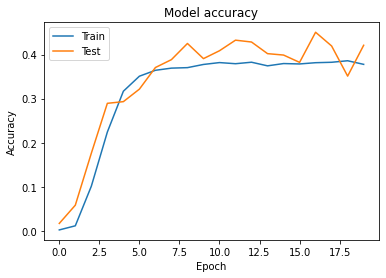

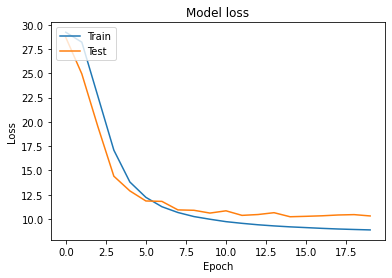

1563/1563 [==============================] - 19s 12ms/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 170, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 80, 170, 32)  896         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 78, 168, 32)  9248        ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (No

In [ ]:
from keras.models import Model, load_model
from keras.layers import Input, Conv2D, MaxPooling2D, LSTM, Dense, Flatten, Dropout, concatenate
from keras import optimizers
import matplotlib.pyplot as plt


tensor_in = Input((80, 170, 3))
out = tensor_in
out = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(out)
out = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(out)
out = MaxPooling2D(pool_size=(2, 2))(out)
out = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(out)
out = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(out)
out = MaxPooling2D(pool_size=(2, 2))(out)
out = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(out)
out = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(out)
out = MaxPooling2D(pool_size=(2, 2))(out)
out = Conv2D(filters=256, kernel_size=(3, 3), activation='relu')(out)
out = MaxPooling2D(pool_size=(2, 2))(out)
out = Flatten()(out)
out = Dropout(0.5)(out)
out1 = Dense(62, name='digit1', activation='softmax')(out)
out2 = Dense(62, name='digit2', activation='softmax')(out)
out3 = Dense(62, name='digit3', activation='softmax')(out)
out4 = Dense(62, name='digit4', activation='softmax')(out)
out5 = Dense(62, name='digit5', activation='softmax')(out)
out = tf.keras.layers.Concatenate()([out1, out2, out3, out4, out5])  
model = Model(inputs=tensor_in, outputs=out)

model.summary()

optimizer = tf.keras.optimizers.RMSprop(lr=1e-3, rho=0.8, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(train_data,train_labels,
                    batch_size =256, epochs=20, verbose=1, 
                    validation_data=(test_data,test_labels) )

#bach_size=256 epoch=20 資料50000 測試10000 精準40% loss都在9%左右 
#bach_size=256 epoch=15 資料50000 測試10000 精準46% loss都在9%左右     
#bach_size=512 epoch=20 資料100000 測試20000 精準30% loss都在9%左右  

#評估模型
scores = model.evaluate(train_data, train_labels, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

#顯示訓練過程
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#顯示訓練過程
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#儲存模型
model.save("captcha_model.h5")

#載入模型
model = load_model("captcha_model.h5")

#預測結果
predictions = model.predict(train_data)
predictions = np.argmax(predictions, axis=1)
predictions = predictions.astype(int)

#顯示預訓練後的模型摘要
model.summary()

#編譯
optimizer = tf.keras.optimizers.RMSprop(lr=1e-3, rho=0.8, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#訓練
history = model.fit(train_data,train_labels,
                    batch_size = 256, epochs=15, verbose=1, 
                    validation_data=(test_data,test_labels) )
        
#評估模型準確率
scores = model.evaluate(train_data, train_labels)
print("測試集上的準確率: %.2f%%" % (scores[1]*100))

#進行預測
prediction = model.predict(train_data)

#顯示預測結果
print("預測結果:", prediction)